In [1]:
#Importing necessary packages
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sb

In [2]:
#Loading in the data
df1 = pd.read_csv('finalcleandatasql.csv')

In [3]:
#Splitting the data by year as well as the 2 years right before the implementation of the fund(i.e. dfprefund in 1980,1981)
#and the first 2 years after the fund(i.e. dfpostfund in 1982,1983)
dfprefund = df1[(df1['countyear'] == 1980) | (df1['countyear'] == 1981)]
dfpostfund = df1[(df1['countyear'] == 1982) | (df1['countyear'] == 1983)]
df1980 = df1[(df1['countyear'] == 1980)]
df1981 = df1[(df1['countyear'] == 1981)]
df1982 = df1[(df1['countyear'] == 1982)]
df1983 = df1[(df1['countyear'] == 1983)]

In [4]:
#Taking a high-level look at the data.
df1

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [5]:
#Creating summary statistics for each dataset by year
df1980.describe().to_csv("1980summarystatistics")
df1981.describe().to_csv("1981summarystatistics")
df1982.describe().to_csv("1982summarystatistics")
df1983.describe().to_csv("1983summarystatistics")

In [6]:
#Creating a dataset without DC as DC is an outlier due to its small size(area and population), high income and high crime rates
dfwithoutdc = df1[df1['statefip'] != 11] 

In [7]:
#Taking a high-level look at the data without DC.
dfwithoutdc

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [8]:
#Taking a high-level look at the data for the final 2 years before the fund with DC.
dfprefund

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1981,51,98,10794,57.50,33,12,2277,10476,650,...,1,589,50,2288,2927,42769,5444097,127,322,4349.1
98,1981,53,99,10901,58.88,20,10,2108,10595,642,...,6,65,171,2514,2750,71303,4235731,59,447,6294.8
99,1981,54,100,8886,63.93,2,49,2002,7910,647,...,0,66,7,2576,2649,24231,1954124,80,175,2443.9
100,1981,55,101,10666,53.93,47,15,1955,10266,630,...,0,97,16,2472,2585,65503,4726343,72,188,4579.0


In [9]:
#Taking a high-level look at the data for the first 2 years after the fund with DC.
dfpostfund

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
102,1982,1,103,9702,64.45,2,48,1917,8724,624,...,0,573,11,1957,2541,52423,3925266,74,448,4185.8
103,1982,2,104,14499,56.64,37,1,1611,15179,611,...,16,67,373,1782,2222,656425,449606,0,624,5588.8
104,1982,4,105,10990,59.54,16,30,1796,10439,576,...,3,42,78,2252,2372,114006,2889861,25,517,6614.0
105,1982,5,106,9168,61.24,8,51,1579,8108,473,...,1,284,25,1743,2052,53182,2294257,43,325,3546.9
106,1982,6,107,11950,57.66,31,9,11796,11706,3806,...,6,1099,1019,13484,15602,163707,24820009,151,815,6470.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [10]:
#Creating a dataset without DC for the final 2 years implementation of the fund
dfprefundwithoutdc = dfprefund[dfprefund['statefip'] != 11] 

In [11]:
#Creating a dataset without DC for the first 2 years after the implementation of the fund
dfpostfundwithoutdc = dfpostfund[dfpostfund['statefip'] != 11] 

In [12]:
#Taking a high-level look at the data for the final 2 years before the fund with DC.
dfprefundwithoutdc

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
0,1980,1,1,8066,64.20,3,51,2153,7103,708,...,0,820,6,2035,2861,52423,3893888,74,449,4485.1
1,1980,2,2,12505,58.54,23,1,1520,13106,606,...,16,96,356,1674,2126,656425,401851,0,436,5209.7
2,1980,4,3,9505,60.32,11,26,2348,8988,815,...,2,61,90,3012,3163,114006,2718215,23,651,7519.9
3,1980,5,4,8145,59.84,16,50,2112,7209,693,...,0,392,22,2391,2805,53182,2286435,42,335,3475.9
4,1980,6,5,10179,58.69,21,10,11498,9921,3633,...,6,988,985,13158,15131,163707,23667902,144,894,6939.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1981,51,98,10794,57.50,33,12,2277,10476,650,...,1,589,50,2288,2927,42769,5444097,127,322,4349.1
98,1981,53,99,10901,58.88,20,10,2108,10595,642,...,6,65,171,2514,2750,71303,4235731,59,447,6294.8
99,1981,54,100,8886,63.93,2,49,2002,7910,647,...,0,66,7,2576,2649,24231,1954124,80,175,2443.9
100,1981,55,101,10666,53.93,47,15,1955,10266,630,...,0,97,16,2472,2585,65503,4726343,72,188,4579.0


In [13]:
#Taking a high-level look at the data for the first 2 years after the fund with DC.
dfpostfundwithoutdc

,countyear,statefip,serialno,avgincomes,ginicoefficient,ginirank,incrank,knownincscount,knownincsavg,unknownincscount,...,otherpercent,blackcount,othercount,whitecount,totalcount,allareas,totalpop,populationdensity,violentcrime,propertycrime
102,1982,1,103,9702,64.45,2,48,1917,8724,624,...,0,573,11,1957,2541,52423,3925266,74,448,4185.8
103,1982,2,104,14499,56.64,37,1,1611,15179,611,...,16,67,373,1782,2222,656425,449606,0,624,5588.8
104,1982,4,105,10990,59.54,16,30,1796,10439,576,...,3,42,78,2252,2372,114006,2889861,25,517,6614.0
105,1982,5,106,9168,61.24,8,51,1579,8108,473,...,1,284,25,1743,2052,53182,2294257,43,325,3546.9
106,1982,6,107,11950,57.66,31,9,11796,11706,3806,...,6,1099,1019,13484,15602,163707,24820009,151,815,6470.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1983,51,200,13115,58.96,25,5,2312,13049,621,...,1,579,46,2308,2933,42769,5564657,130,293,3669.0
200,1983,53,201,12635,58.18,30,12,1782,12401,574,...,3,77,88,2191,2356,71303,4300266,60,372,5706.0
201,1983,54,202,9957,66.33,1,49,1512,8881,478,...,0,54,1,1935,1990,24231,1945061,80,172,2247.2
202,1983,55,203,12132,57.67,34,16,1959,11771,577,...,0,109,25,2402,2536,65503,4721438,72,191,4064.8


In [14]:
#Creating our model. Taken from https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d.
X1 = df1.iloc[:,3].values.reshape(-1, 1)
X2 = df1.iloc[:,4].values.reshape(-1, 1)
X3 = dfwithoutdc.iloc[:,3].values.reshape(-1, 1)
X4 = dfwithoutdc.iloc[:,4].values.reshape(-1, 1)
X5 = dfprefundwithoutdc.iloc[:,3].values.reshape(-1, 1)
X6 = dfprefundwithoutdc.iloc[:,4].values.reshape(-1, 1)
X7 = dfpostfundwithoutdc.iloc[:,3].values.reshape(-1, 1)
X8 = dfpostfundwithoutdc.iloc[:,4].values.reshape(-1, 1)
Y1 = df1.iloc[:,21].values.reshape(-1, 1)
Y2 = df1.iloc[:,22].values.reshape(-1, 1)
Y3 = dfwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y4 = dfwithoutdc.iloc[:,22].values.reshape(-1, 1)
Y5 = dfprefundwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y6 = dfprefundwithoutdc.iloc[:,22].values.reshape(-1, 1)
Y7 = dfpostfundwithoutdc.iloc[:,21].values.reshape(-1, 1)
Y8 = dfpostfundwithoutdc.iloc[:,22].values.reshape(-1, 1)
linear_regressor = LinearRegression()
linear_regressor.fit(X1, Y1)
linear_regressor.fit(X1, Y2)
linear_regressor.fit(X2, Y1)
linear_regressor.fit(X2, Y2)
linear_regressor.fit(X3, Y3)
linear_regressor.fit(X3, Y4)
linear_regressor.fit(X4, Y3)
linear_regressor.fit(X4, Y4)
linear_regressor.fit(X5, Y5)
linear_regressor.fit(X5, Y6)
linear_regressor.fit(X6, Y5)
linear_regressor.fit(X6, Y6)
linear_regressor.fit(X7, Y7)
linear_regressor.fit(X7, Y8)
linear_regressor.fit(X8, Y7)
linear_regressor.fit(X8, Y8)
Y_predv1 = linear_regressor.predict(X1) 
Y_predp1 = linear_regressor.predict(X1) 
Y_predv2 = linear_regressor.predict(X2)
Y_predp2 = linear_regressor.predict(X2) 
Y_predv3 = linear_regressor.predict(X3)
Y_predp3 = linear_regressor.predict(X3) 
Y_predv4 = linear_regressor.predict(X4)
Y_predp4 = linear_regressor.predict(X4) 
Y_predv5 = linear_regressor.predict(X5)
Y_predp5 = linear_regressor.predict(X5) 
Y_predv6 = linear_regressor.predict(X6)
Y_predp6 = linear_regressor.predict(X6) 
Y_predv7 = linear_regressor.predict(X7)
Y_predp7 = linear_regressor.predict(X7) 
Y_predv8 = linear_regressor.predict(X8) 
Y_predp8 = linear_regressor.predict(X8) 

In [15]:
#Reading some values of the data.
X1, X2, Y1, Y2

(array([[ 8066],
        [12505],
        [ 9505],
        [ 8145],
        [10179],
        [10773],
        [10495],
        [ 9571],
        [10636],
        [ 8678],
        [ 9241],
        [10014],
        [ 9218],
        [10230],
        [ 9500],
        [ 9444],
        [ 9639],
        [ 8597],
        [ 8670],
        [ 8182],
        [10685],
        [ 9662],
        [10013],
        [ 9662],
        [ 8202],
        [ 9305],
        [ 9191],
        [ 8993],
        [10290],
        [ 9730],
        [ 9923],
        [ 8656],
        [ 9338],
        [ 8835],
        [ 8970],
        [ 9793],
        [ 9018],
        [ 9636],
        [ 9260],
        [ 9489],
        [ 8283],
        [ 8692],
        [ 8545],
        [ 9270],
        [ 9720],
        [ 8764],
        [10055],
        [10547],
        [ 8294],
        [ 9830],
        [10497],
        [ 8974],
        [13525],
        [10459],
        [ 8642],
        [11056],
        [11175],
        [11126],
        [10626

In [16]:
#Adding in constants for our regression.
v1 = sm.add_constant(X1)
v2 = sm.add_constant(X2)
v3 = sm.add_constant(X3)
v4 = sm.add_constant(X4)
v5 = sm.add_constant(X5)
v6 = sm.add_constant(X6)
v7 = sm.add_constant(X7)
v8 = sm.add_constant(X8)

Text(0.5, 1.0, 'Fig 1. All violent crime rates vs average incomes')

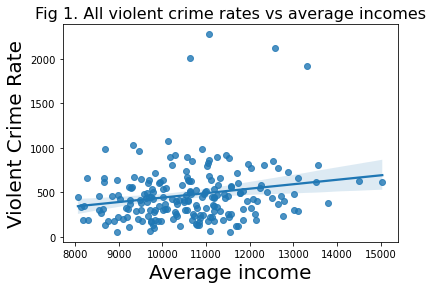

In [17]:
#Visualizing figure 1.
p1 = sb.regplot(x=X1,y=Y1)
p1.set_xlabel("Average income", fontsize = 20)
p1.set_ylabel("Violent Crime Rate", fontsize = 20)
p1.set_title("Fig 1. All violent crime rates vs average incomes", fontsize = 16)

From this plot, we can see there is an outlier which is DC.

Text(0.5, 1.0, 'Fig 2. All property crime rates vs average incomes')

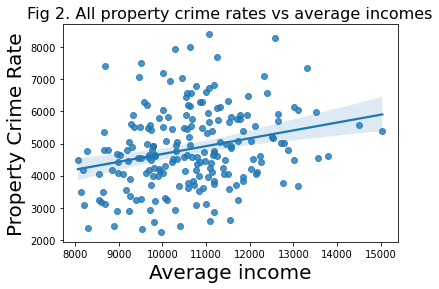

In [18]:
#Visualizing figure 2.
p2 = sb.regplot(x=X1,y=Y2)
p2.set_xlabel("Average income", fontsize = 20)
p2.set_ylabel("Property Crime Rate", fontsize = 20)
p2.set_title("Fig 2. All property crime rates vs average incomes", fontsize = 16)

Text(0.5, 1.0, 'Fig 3. All violent crime rates vs Gini coefficients')

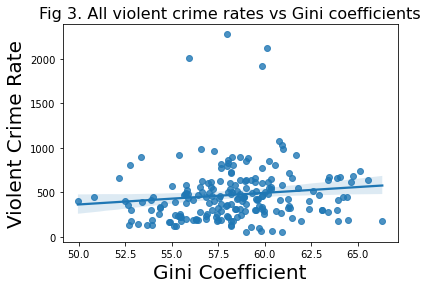

In [19]:
#Visualizing figure 3.
p3 = sb.regplot(x=X2,y=Y1)
p3.set_xlabel("Gini Coefficient", fontsize = 20)
p3.set_ylabel("Violent Crime Rate", fontsize = 20)
p3.set_title("Fig 3. All violent crime rates vs Gini coefficients", fontsize = 16)

From this plot, we can see DC is an outlier for violent crime once again. This means it is best to do our analysis for violent crime without DC altogether as it would skew the results. It is hypothesized DC would have significantly higher violent crime anyway due to the significantly higher population density. I also think the reason it is not an outlier for property crime is because of the significantly higher mean income compared to the other states.

Text(0.5, 1.0, 'Fig 4. All property crime rates vs Gini coefficients')

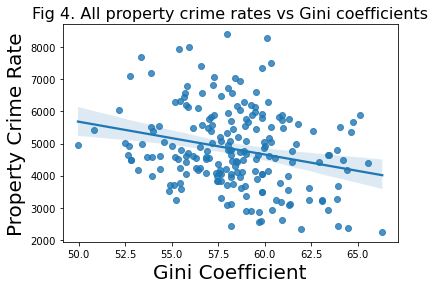

In [20]:
#Visualizing figure 4.
p4 = sb.regplot(x=X2,y=Y2)
p4.set_xlabel("Gini Coefficient", fontsize = 20)
p4.set_ylabel("Property Crime Rate", fontsize = 20)
p4.set_title("Fig 4. All property crime rates vs Gini coefficients", fontsize = 16)

As hypothesized, DC is not an outlier for property crime.

Text(0.5, 1.0, 'Fig 5. All violent crime rates vs average incomes besides DC')

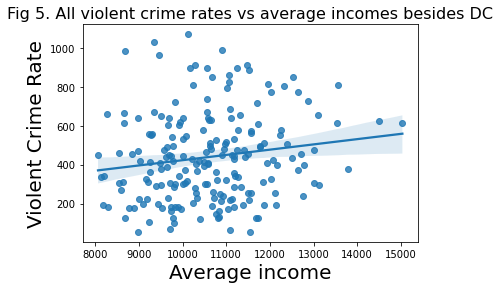

In [21]:
#Visualizing figure 5.
p5 = sb.regplot(x=X3,y=Y3)
p5.set_xlabel("Average income", fontsize = 20)
p5.set_ylabel("Violent Crime Rate", fontsize = 20)
p5.set_title("Fig 5. All violent crime rates vs average incomes besides DC", fontsize = 16)

It can be argued there is a weak positive correlation here although p-values need to be seen to comprehend it better. The correlation is very weak and not that 

Text(0.5, 1.0, 'Fig 6. All property crime rates vs Average Incomes besides DC')

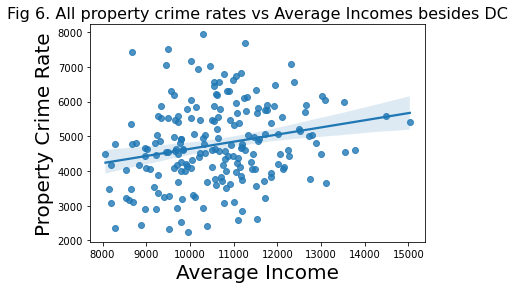

In [22]:
#Visualizing figure 6.
p6 = sb.regplot(x=X3,y=Y4)
p6.set_xlabel("Average Income", fontsize = 20)
p6.set_ylabel("Property Crime Rate", fontsize = 20)
p6.set_title("Fig 6. All property crime rates vs Average Incomes besides DC", fontsize = 16)

Once again, by insepction, there appears to be a weak positive correaltion. The causal reason for this may be that as society becomes ultra-wealthy, there is more to steal and so people commit property crimes due to jealousy.

Text(0.5, 1.0, 'Fig 7. All violent crime rates vs Average incomes besides DC')

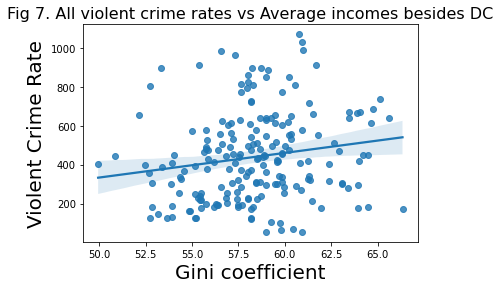

In [23]:
#Visualizing figure 7.
p7 = sb.regplot(x=X4,y=Y3)
p7.set_xlabel("Gini coefficient", fontsize = 20)
p7.set_ylabel("Violent Crime Rate", fontsize = 20)
p7.set_title("Fig 7. All violent crime rates vs Average incomes besides DC", fontsize = 16)

There appears to be no correlation according to the naked eye.

Text(0.5, 1.0, 'Fig 8. All property crime rates vs Gini coefficients besides DC')

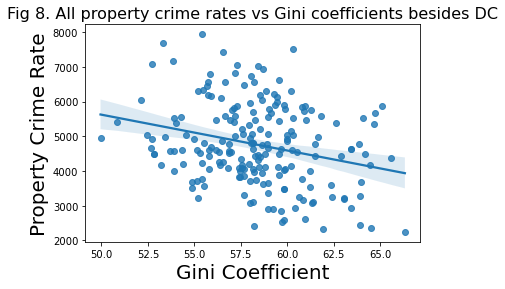

In [24]:
#Visualizing figure 8.
p8 = sb.regplot(x=X4,y=Y4)
p8.set_xlabel("Gini Coefficient", fontsize = 20)
p8.set_ylabel("Property Crime Rate", fontsize = 20)
p8.set_title("Fig 8. All property crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be a much stronger negative correlation where property crime goes down as income inequality increases.

Text(0.5, 1.0, 'Fig 9. 1980-81 violent crime rates vs Average incomes besides DC')

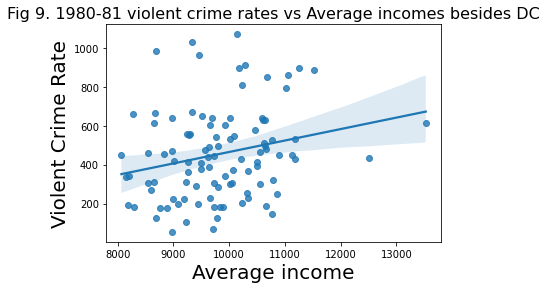

In [25]:
#Visualizing figure 9.
p9 = sb.regplot(x=X5,y=Y5)
p9.set_xlabel("Average income", fontsize = 20)
p9.set_ylabel("Violent Crime Rate", fontsize = 20)
p9.set_title("Fig 9. 1980-81 violent crime rates vs Average incomes besides DC", fontsize = 16)

There appears to be a strongish postive correlation here where violent crime goes up as mean income goes up.

Text(0.5, 1.0, 'Fig 10. 1980-81 property crime rates vs Average incomes besides DC')

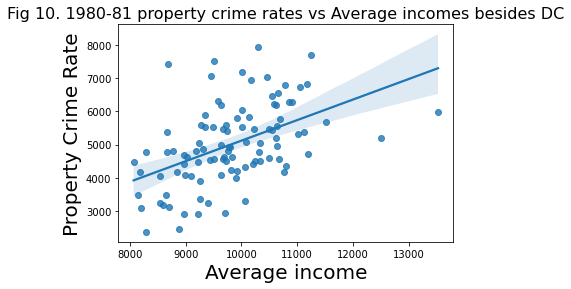

In [26]:
#Visualizing figure 10.
p10 = sb.regplot(x=X5,y=Y6)
p10.set_xlabel("Average income", fontsize = 20)
p10.set_ylabel("Property Crime Rate", fontsize = 20)
p10.set_title("Fig 10. 1980-81 property crime rates vs Average incomes besides DC", fontsize = 16)

There appears to be a very strong postive correlation between property crime going up as income goes up.

Text(0.5, 1.0, 'Fig 11. 1980-81 violent crime rates vs Gini coefficients besides DC')

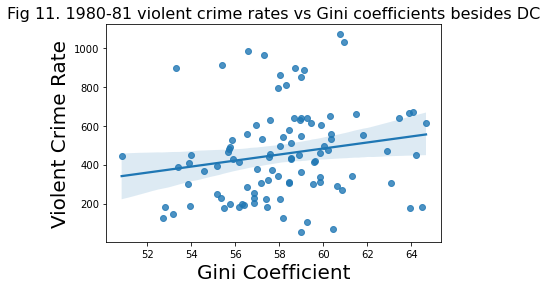

In [27]:
#Visualizing figure 11.
p11 = sb.regplot(x=X6,y=Y5)
p11.set_xlabel("Gini Coefficient", fontsize = 20)
p11.set_ylabel("Violent Crime Rate", fontsize = 20)
p11.set_title("Fig 11. 1980-81 violent crime rates vs Gini coefficients besides DC", fontsize = 16)

There seems to be no correlation here.

Text(0.5, 1.0, 'Fig 12. 1980-81 property crime rates vs Gini coefficients besides DC')

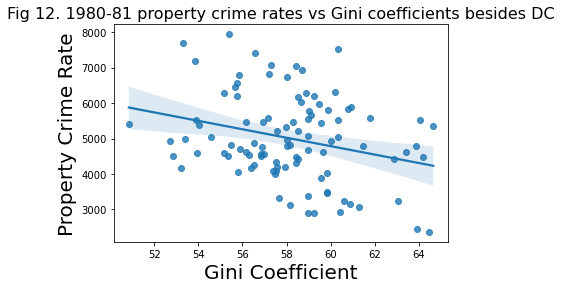

In [28]:
#Visualizing figure 12.
p12 = sb.regplot(x=X6,y=Y6)
p12.set_xlabel("Gini Coefficient", fontsize = 20)
p12.set_ylabel("Property Crime Rate", fontsize = 20)
p12.set_title("Fig 12. 1980-81 property crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be a weak negative correlation here.

Text(0.5, 1.0, 'Fig 13. 1982-83 violent crime rates vs Average Incomes besides DC')

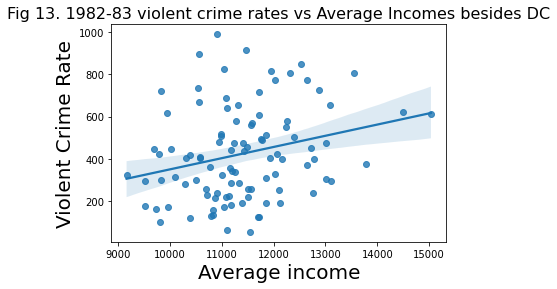

In [29]:
#Visualizing figure 13.
p13 = sb.regplot(x=X7,y=Y7)
p13.set_xlabel("Average income", fontsize = 20)
p13.set_ylabel("Violent Crime Rate", fontsize = 20)
p13.set_title("Fig 13. 1982-83 violent crime rates vs Average Incomes besides DC", fontsize = 16)

There appears to be a weak positive correlation here where violent crime goes up as average income increases. 

Text(0.5, 1.0, 'Fig 14. 1982-83 property crime rates vs Average Incomes besides DC')

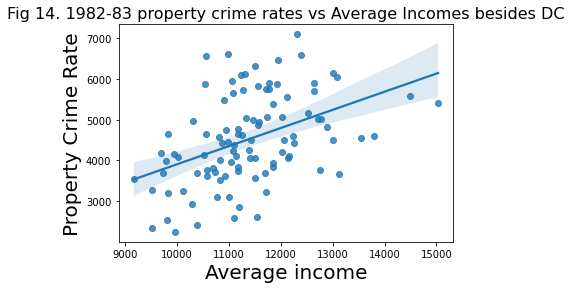

In [30]:
#Visualizing figure 14.
p14 = sb.regplot(x=X7,y=Y8)
p14.set_xlabel("Average income", fontsize = 20)
p14.set_ylabel("Property Crime Rate", fontsize = 20)
p14.set_title("Fig 14. 1982-83 property crime rates vs Average Incomes besides DC", fontsize = 16)

There is a very strong positive correlation here as property crime goes up as average income goes up.

Text(0.5, 1.0, 'Fig 15. 1982-83 violent crime rates vs Gini coefficients besides DC')

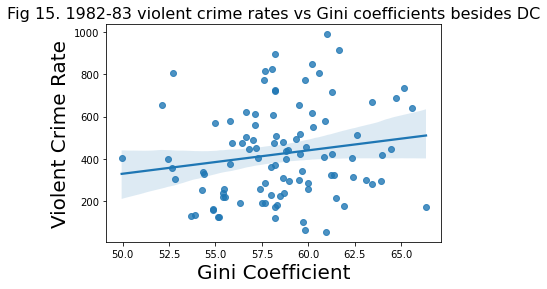

In [31]:
#Visualizing figure 15.
p15 = sb.regplot(x=X8,y=Y7)
p15.set_xlabel("Gini Coefficient", fontsize = 20)
p15.set_ylabel("Violent Crime Rate", fontsize = 20)
p15.set_title("Fig 15. 1982-83 violent crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be no correlation between the Gini coefficient and income inequality.

Text(0.5, 1.0, 'Fig 16. 1982-83 property crime rates vs Gini coefficients besides DC')

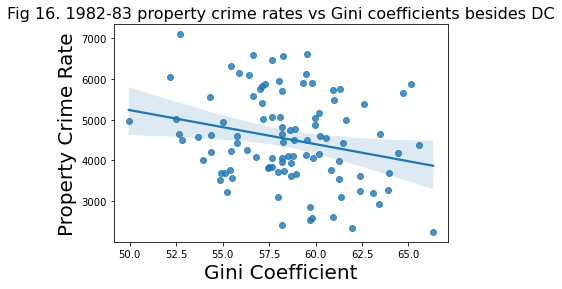

In [32]:
#Visualizing figure 16.
p16 = sb.regplot(x=X8,y=Y8)
p16.set_xlabel("Gini Coefficient", fontsize = 20)
p16.set_ylabel("Property Crime Rate", fontsize = 20)
p16.set_title("Fig 16. 1982-83 property crime rates vs Gini coefficients besides DC", fontsize = 16)

There appears to be a slightly weak negative correlation between property crime and income inequality.

In [33]:
#Fitting a linear regression model to the data which we will get parameters and p-values from later.
res1 = sm.OLS(df1['violentcrime'], v1).fit()
res2 = sm.OLS(df1['propertycrime'], v1).fit()
res3 = sm.OLS(df1['violentcrime'], v2).fit()
res4 = sm.OLS(df1['propertycrime'], v2).fit()
res5 = sm.OLS(dfwithoutdc['violentcrime'], v3).fit()
res6 = sm.OLS(dfwithoutdc['propertycrime'], v3).fit()
res7 = sm.OLS(dfwithoutdc['violentcrime'], v4).fit()
res8 = sm.OLS(dfwithoutdc['propertycrime'], v4).fit()
res9 = sm.OLS(dfprefundwithoutdc['violentcrime'], v5).fit()
res10 = sm.OLS(dfprefundwithoutdc['propertycrime'], v5).fit()
res11 = sm.OLS(dfprefundwithoutdc['violentcrime'], v6).fit()
res12 = sm.OLS(dfprefundwithoutdc['propertycrime'], v6).fit()
res13 = sm.OLS(dfpostfundwithoutdc['violentcrime'], v7).fit()
res14 = sm.OLS(dfpostfundwithoutdc['propertycrime'], v7).fit()
res15 = sm.OLS(dfpostfundwithoutdc['violentcrime'], v8).fit()
res16 = sm.OLS(dfpostfundwithoutdc['propertycrime'], v8).fit()

In [34]:
#Creating a list of fits.
resultslist = [res1,res2,res3,res4,res5,res6,res7,res8,res9,res10,res11,res12,res13,res14,
              res15,res16]

In [35]:
#Creating a lists of parameters.
for (a,b) in zip(resultslist, range(1,17)):
    z = str(a.summary())
    y = "Fig " + str(b) + ".\n" + z
    print(y)

Fig 1.
                            OLS Regression Results                            
Dep. Variable:           violentcrime   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     8.532
Date:                Thu, 15 Dec 2022   Prob (F-statistic):            0.00389
Time:                        14:37:21   Log-Likelihood:                -1461.3
No. Observations:                 204   AIC:                             2927.
Df Residuals:                     202   BIC:                             2933.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -61.1091    183.563     -0.333  